In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random 
import time
import seaborn as sns

<IPython.core.display.Javascript object>


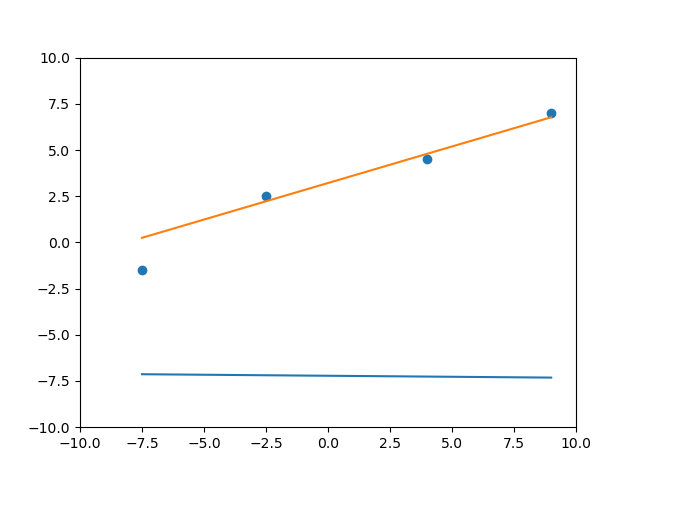

1.2657433367682636 0.3954074645823786 3.2134990181403054


In [2]:
%matplotlib notebook
random.seed(61)

x_data = np.array([-7.5,-2.5,4,9])
y_data = np.array([-1.5,2.5,4.5,7])

def run_model(x):
    global m,c
    y = m*x + c
    return y

m = random.uniform(-1,1)
c = random.uniform(-10,-5)

y_init = run_model(x_data)

fig = plt.figure()
plt.axis([-10, 10, -10, 10])
plt.scatter(x_data,y_data)
plt.plot(x_data,y_init)
fig.canvas.draw()

learn_rate = 0.01
iterations = 100
for i in range(iterations):
    for x,t in zip(x_data,y_data):
        y = run_model(x)
        error = np.abs(t - y)
        m = m + learn_rate*error*x
        c = c + learn_rate*error

    y_next = run_model(x_data)

    line, = plt.plot(x_data,y_next)
    fig.canvas.draw()
    line.remove()
    time.sleep(0.1)
gradient_descent_prediction = y_next
plt.plot(x_data,y_next)
fig.canvas.draw()
print(error,m,c)

<IPython.core.display.Javascript object>


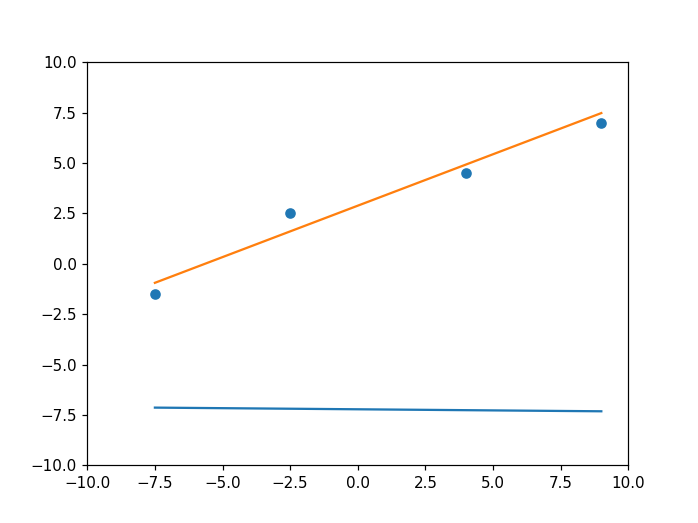

0.8092716569775568
0.498587338779402
0.42228054691756955
0.3781669172552904
0.5102690384453654 2.8837275385908354


In [3]:
%matplotlib notebook
random.seed(61)

x_data = np.array([-7.5,-2.5,4,9])
y_data = np.array([-1.5,2.5,4.5,7])

m = random.uniform(-1,1)
c = 0

fig = plt.figure()
plt.axis([-10, 10, -10, 10])
plt.scatter(x_data,y_data)
plt.plot(x_data,y_init)
fig.canvas.draw()

iterations = 500
lowest_error  = 10000000
avg_err=0
m_best = 0
c_best = 0
for i in range(iterations):
    avg_err=0
    m = random.uniform(0,1)
    c = random.uniform(0,4)
    for x,t in zip(x_data,y_data):
        y = run_model(x)
        error = (t - y)**2
        avg_err += error

    avg_err /= 4
    if (avg_err<lowest_error):
        lowest_error = avg_err
        m_best = m
        c_best = c
        print(avg_err)
    y_next = run_model(x_data)

    line, = plt.plot(x_data,y_next)
    fig.canvas.draw()
    line.remove()
m=m_best
c=c_best
y_next = run_model(x_data)
best_random_model_prediction = y_next
plt.plot(x_data,y_next)
fig.canvas.draw()

print(m_best,c_best)

<IPython.core.display.Javascript object>


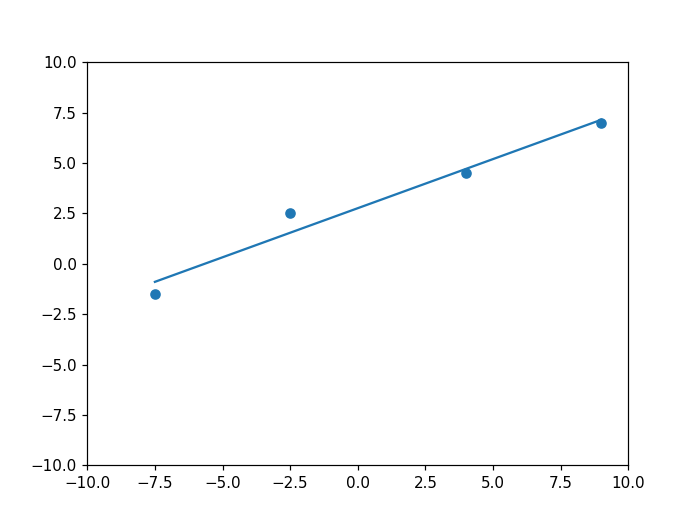

In [4]:
from sklearn import linear_model

x_data = np.array([-7.5,-2.5,4,9]).reshape([-1, 1])
y_data = np.array([-1.5,2.5,4.5,7]).reshape([-1, 1])
regr = linear_model.LinearRegression()
regr.fit(x_data,y_data)
y_pred = regr.predict(x_data)
sk_learn_prediction=y_pred
fig = plt.figure()
plt.axis([-10, 10, -10, 10])
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred)
fig.canvas.draw()



In [5]:
y_data.reshape([1,-1])


array([[-1.5,  2.5,  4.5,  7. ]])

In [6]:
sk_learn_prediction.reshape([1,-1])

array([[-0.89507154,  1.54133545,  4.70866455,  7.14507154]])

In [7]:
best_random_model_prediction

array([-0.94329025,  1.60805494,  4.92480369,  7.47614888])

In [8]:
for y,gd,r,sk in zip(y_data,gradient_descent_prediction,best_random_model_prediction,sk_learn_prediction):
    print("Y =",y[0],"  Gradient Descent ="  ,gd,"  Random Model = ",r, "  Scikit learn = ",sk[0])

Y = -1.5   Gradient Descent = 0.24794303377246596   Random Model =  -0.9432902497494053   Scikit learn =  -0.8950715421303657
Y = 2.5   Gradient Descent = 2.224980356684359   Random Model =  1.608054942477422   Scikit learn =  1.5413354531001588
Y = 4.5   Gradient Descent = 4.7951288764698194   Random Model =  4.924803692372297   Scikit learn =  4.708664546899841
Y = 7.0   Gradient Descent = 6.772166199381712   Random Model =  7.476148884599124   Scikit learn =  7.145071542130365


In [9]:
gradient_descent_prediction.shape

(4,)

In [10]:
from tabulate import tabulate
data = [y_data,
gradient_descent_prediction,
best_random_model_prediction,
sk_learn_prediction] 
print (tabulate(data))#, headers=["Y", "Gradient Descent", "Random Model", "Scikit learn"]))

---------  -------  -------  -------
-1.5       2.5      4.5      7
 0.247943  2.22498  4.79513  6.77217
-0.94329   1.60805  4.9248   7.47615
-0.895072  1.54134  4.70866  7.14507
---------  -------  -------  -------
